In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('International_Education_Costs.csv')

In [3]:
# Calculate Total Cost in USD (no change needed as values are already in USD)
df['Total_Cost_USD'] = (
    df['Tuition_USD'] +  # One-time tuition cost
    (df['Rent_USD'] * 12 * df['Duration_Years']) +  # Monthly rent × months per year × years
    df['Visa_Fee_USD'] +  # One-time visa fee
    (df['Insurance_USD'] * df['Duration_Years'])  # Annual insurance × years
)

# Calculate Total Cost in Local Currency
df['Total_Cost_Local'] = df['Total_Cost_USD'] * df['Exchange_Rate']

# Display the first few rows with both USD and Local Currency costs
df[['Country', 'University', 'Program', 'Duration_Years', 
    'Total_Cost_USD', 'Exchange_Rate', 'Total_Cost_Local']].head()


,Country,University,Program,Duration_Years,Total_Cost_USD,Exchange_Rate,Total_Cost_Local
0,USA,Harvard University,Computer Science,2.0,111360.0,1.00,111360.00
1,UK,Imperial College London,Data Science,1.0,64085.0,0.79,50627.15
2,Canada,University of Toronto,Business Analytics,2.0,78935.0,1.35,106562.25
3,Australia,University of Melbourne,Engineering,2.0,77350.0,1.52,117572.00
4,Germany,Technical University of Munich,Mechanical Engineering,2.0,28075.0,0.92,25829.00


In [4]:
# Set the style for better visualizations
#plt.style.use('seaborn')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [5]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualizations
sns.set_style("whitegrid")
sns.set_palette("husl")

## Compute baseline Total Cost of Attendance (tuition + rent × months + visa + insurance × years).


In [19]:
# 1. Compute Total Cost of Attendance
df['Total_Cost_USD'] = (
    df['Tuition_USD'] +  # One-time tuition cost
    (df['Rent_USD'] * 12 * df['Duration_Years']) +  # Monthly rent × months per year × years
    df['Visa_Fee_USD'] +  # One-time visa fee
    (df['Insurance_USD'] * df['Duration_Years'])  # Annual insurance × years
)

# Calculate Total Cost in Local Currency
df['Total_Cost_Local'] = df['Total_Cost_USD'] * df['Exchange_Rate']

# Basic statistics of the total costs
print("Summary Statistics for Total Costs (USD):")
print(df['Total_Cost_USD'].describe())
print("\nSummary Statistics for Total Costs (Local Currency):")
print(df['Total_Cost_Local'].describe())

df

Summary Statistics for Total Costs (USD):
count      907.00
mean     52218.11
std      37459.16
min       5700.00
25%      22644.50
50%      40020.00
75%      75600.00
max     199860.00
Name: Total_Cost_USD, dtype: float64

Summary Statistics for Total Costs (Local Currency):
count         907.00
mean     11509393.07
std      69344019.67
min          5056.50
25%         41768.00
50%         97270.60
75%        187485.62
max     823189500.00
Name: Total_Cost_Local, dtype: float64


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Cost_Attendance,Total_Cost_USD,Total_Cost_Local
0,USA,Cambridge,Harvard University,Computer Science,Master,2.00,55400,83.50,2200,160,1500,1.00,111360.00,111360.00,111360.00
1,UK,London,Imperial College London,Data Science,Master,1.00,41200,75.80,1800,485,800,0.79,64085.00,64085.00,50627.15
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.00,38500,72.50,1600,235,900,1.35,78935.00,78935.00,106562.25
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.00,42000,71.20,1400,450,650,1.52,77350.00,77350.00,117572.00
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.00,500,70.50,1100,75,550,0.92,28075.00,28075.00,25829.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.00,4000,70.20,1000,99,850,0.92,29799.00,29799.00,27415.08
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.00,6800,50.50,400,120,400,4.65,22520.00,22520.00,104718.00
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.00,4200,64.20,600,200,800,3.75,20400.00,20400.00,76500.00
905,USA,Seattle,University of Washington,Software Development,PhD,5.00,50000,77.80,2000,160,1500,1.00,177660.00,177660.00,177660.00


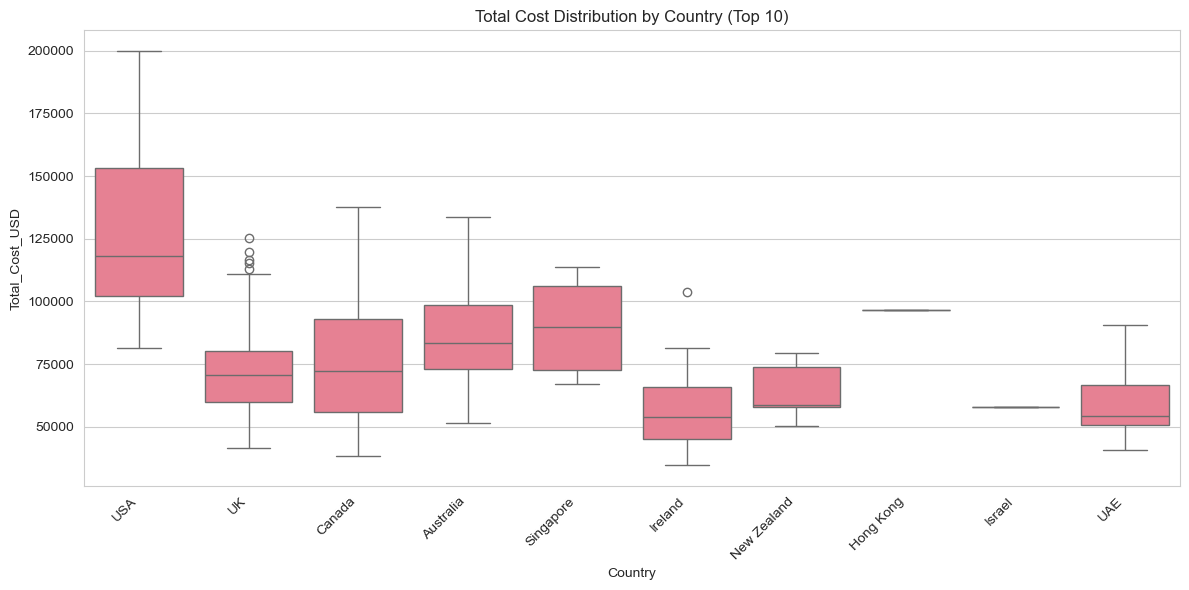

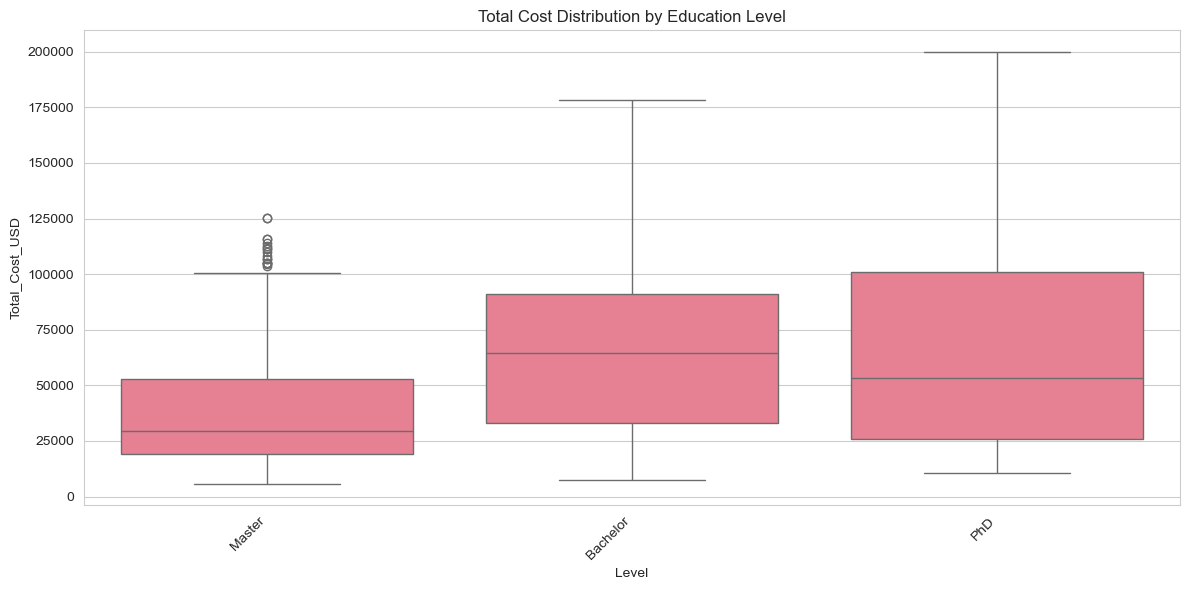

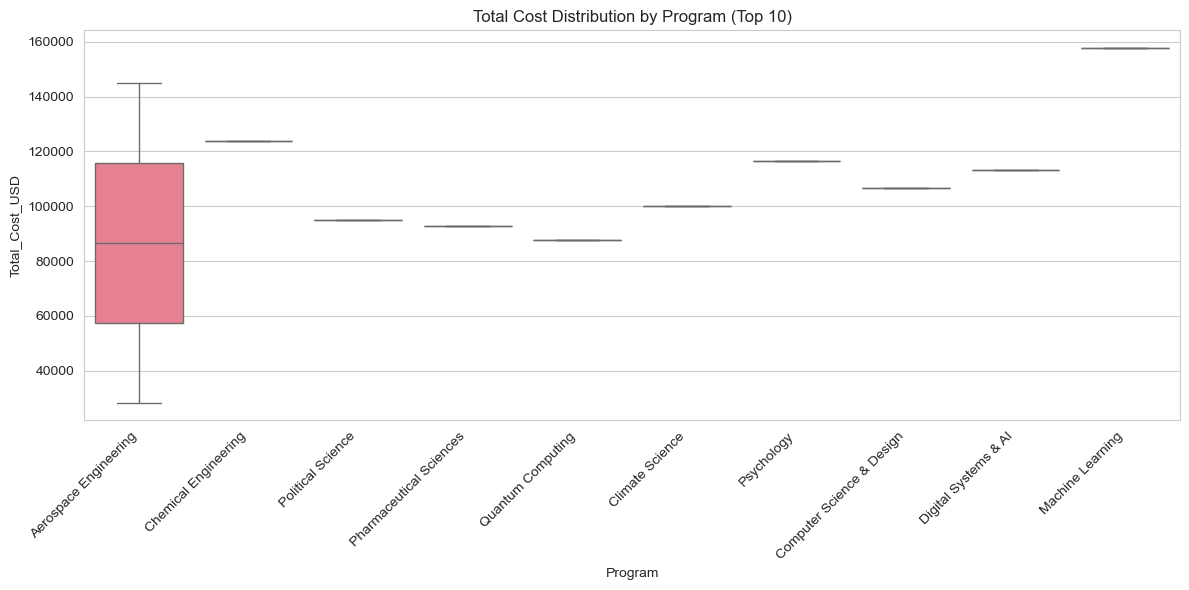


Average Total Cost by Education Level:
Level
PhD        69115.42
Bachelor   64526.49
Master     38155.45
Name: Total_Cost_USD, dtype: float64


In [7]:
# 2. Profile cost distributions by Country, City, Level, and Program

# Function to create boxplots
def create_boxplot(data, x_col, y_col, title, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Top 10 countries by median total cost
top_10_countries = df.groupby('Country')['Total_Cost_USD'].median().nlargest(10).index
df_top_10 = df[df['Country'].isin(top_10_countries)]

# Create boxplots
create_boxplot(df_top_10, 'Country', 'Total_Cost_USD', 'Total Cost Distribution by Country (Top 10)')
create_boxplot(df, 'Level', 'Total_Cost_USD', 'Total Cost Distribution by Education Level')

# Top 10 programs by median total cost
top_10_programs = df.groupby('Program')['Total_Cost_USD'].median().nlargest(10).index
df_top_10_programs = df[df['Program'].isin(top_10_programs)]
create_boxplot(df_top_10_programs, 'Program', 'Total_Cost_USD', 'Total Cost Distribution by Program (Top 10)')

# Calculate and display average costs by level
print("\nAverage Total Cost by Education Level:")
print(df.groupby('Level')['Total_Cost_USD'].mean().sort_values(ascending=False))


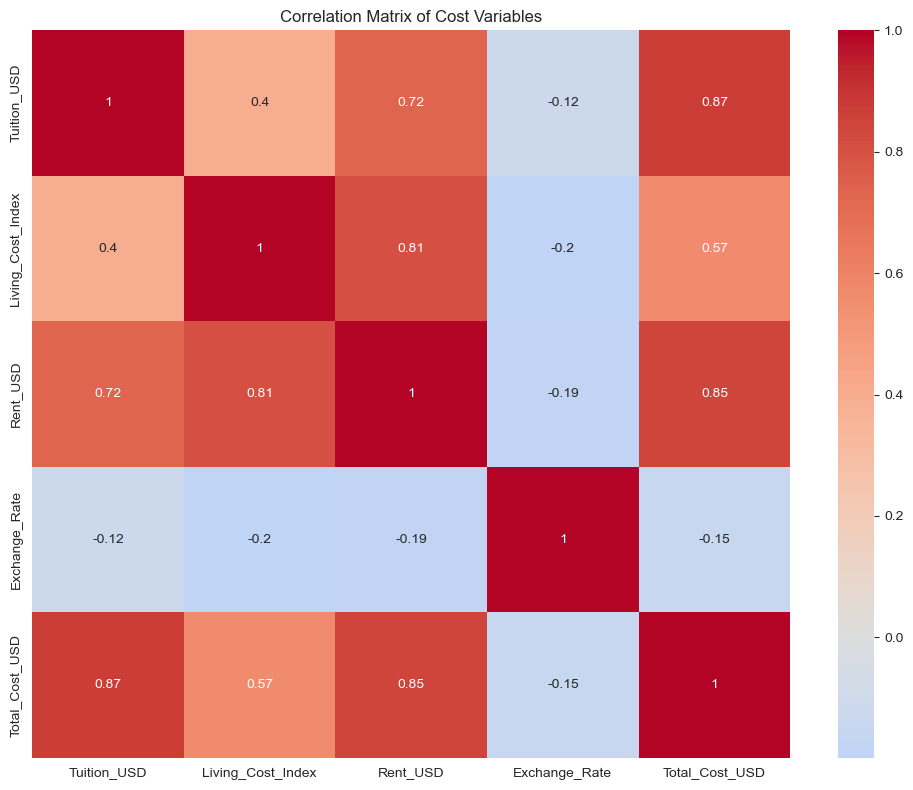

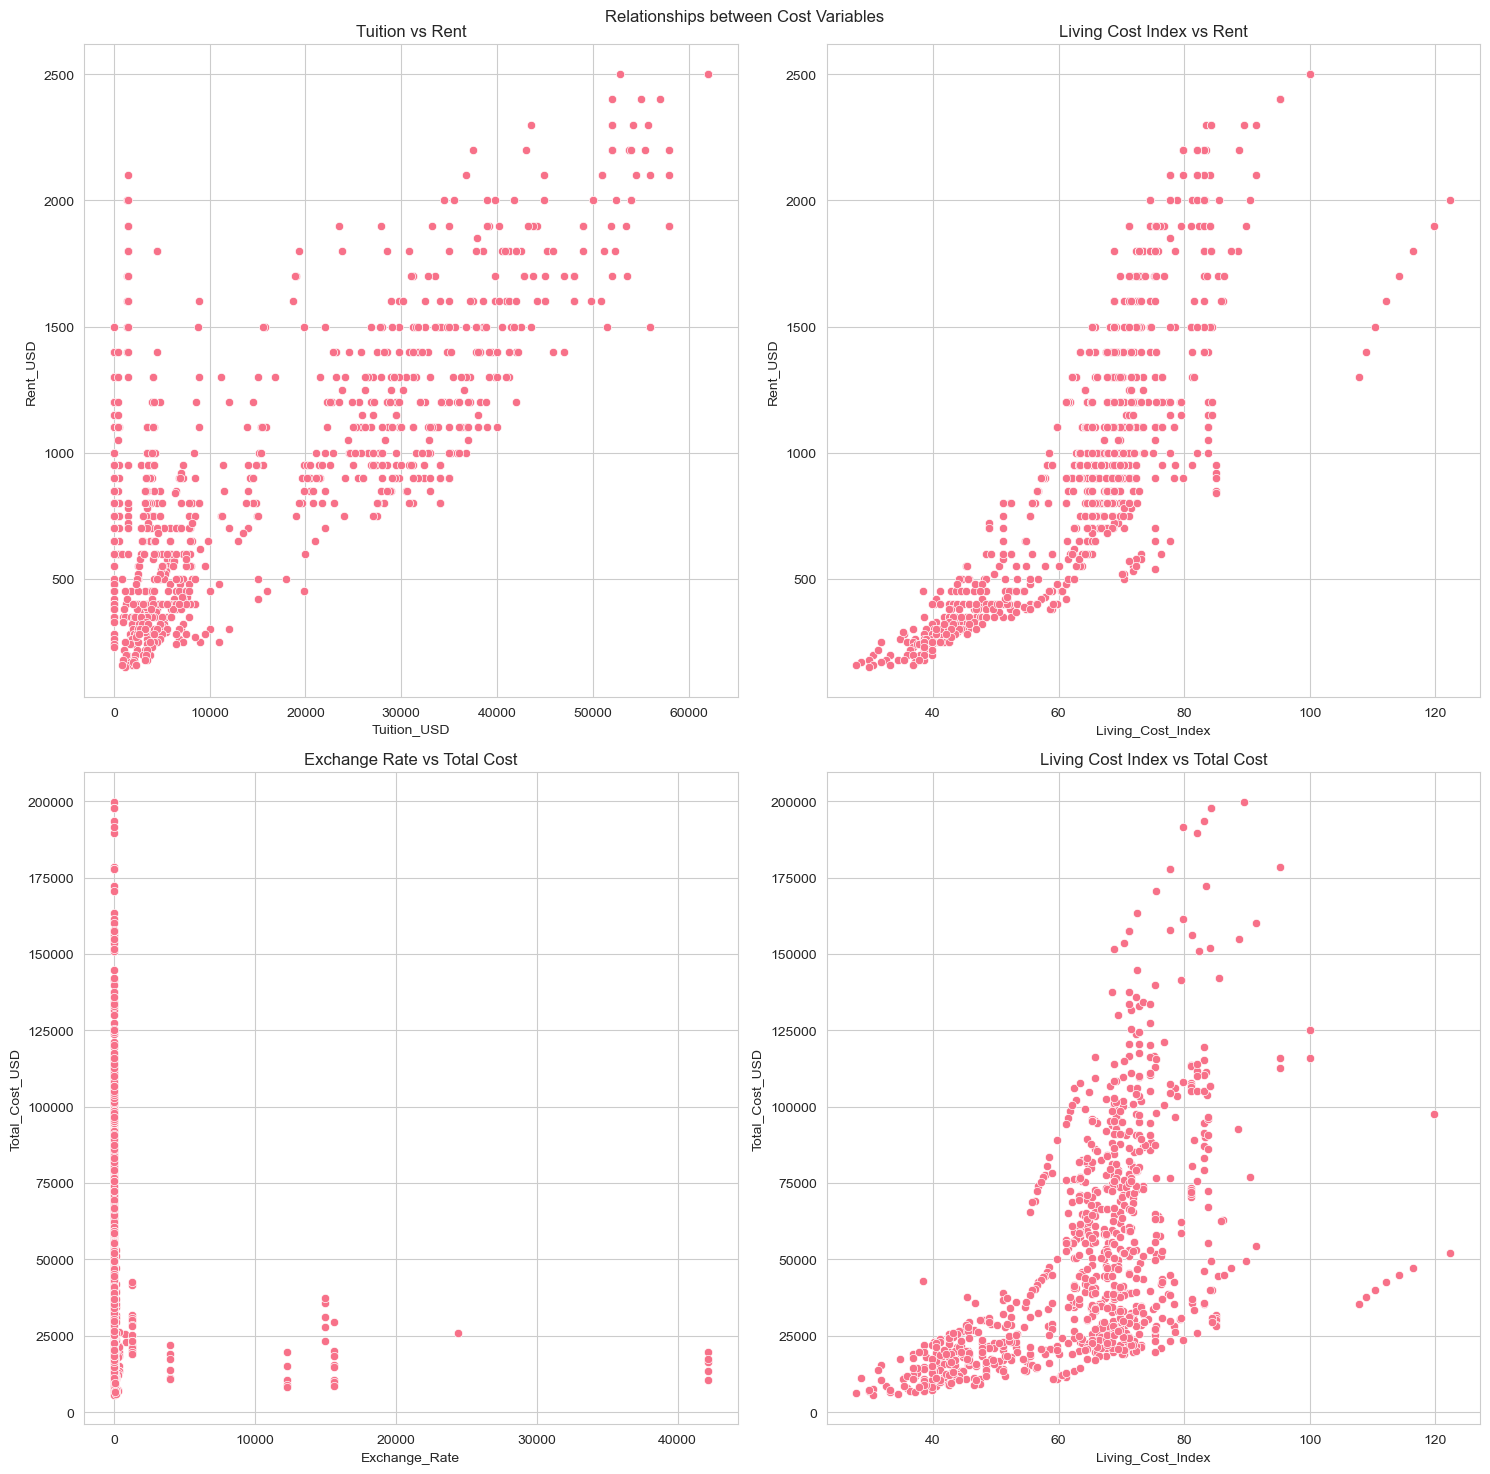

In [8]:
# 3. Visualize correlations among cost variables

# Select numerical columns for correlation analysis
cost_columns = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Exchange_Rate', 'Total_Cost_USD']

# Create correlation matrix
correlation_matrix = df[cost_columns].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cost Variables')
plt.tight_layout()
plt.show()

# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Relationships between Cost Variables')

# Tuition vs Rent
sns.scatterplot(data=df, x='Tuition_USD', y='Rent_USD', ax=axes[0,0])
axes[0,0].set_title('Tuition vs Rent')

# Living Cost Index vs Rent
sns.scatterplot(data=df, x='Living_Cost_Index', y='Rent_USD', ax=axes[0,1])
axes[0,1].set_title('Living Cost Index vs Rent')

# Exchange Rate vs Total Cost
sns.scatterplot(data=df, x='Exchange_Rate', y='Total_Cost_USD', ax=axes[1,0])
axes[1,0].set_title('Exchange Rate vs Total Cost')

# Living Cost Index vs Total Cost
sns.scatterplot(data=df, x='Living_Cost_Index', y='Total_Cost_USD', ax=axes[1,1])
axes[1,1].set_title('Living Cost Index vs Total Cost')

plt.tight_layout()
plt.show()


Outlier Analysis:

Outliers in Tuition_USD:
Number of outliers: 0
Percentage of outliers: 0.00%

Top 5 highest outliers:
Empty DataFrame
Columns: [Country, University, Program, Tuition_USD]
Index: []

Outliers in Rent_USD:
Number of outliers: 3
Percentage of outliers: 0.33%

Top 5 highest outliers:
    Country           University       Program  Rent_USD
131     USA  Columbia University  Data Science      2500
412     USA  Columbia University     Economics      2500
877     USA  Columbia University  Data Science      2500

Outliers in Total_Cost_USD:
Number of outliers: 18
Percentage of outliers: 1.98%

Top 5 highest outliers:
    Country           University                 Program  Total_Cost_USD
29      USA  Stanford University        Computer Science       199860.00
402     USA  Stanford University                 Physics       197660.00
856     USA  Stanford University        Computer Science       197660.00
30      USA                  MIT  Electrical Engineering       193460.00


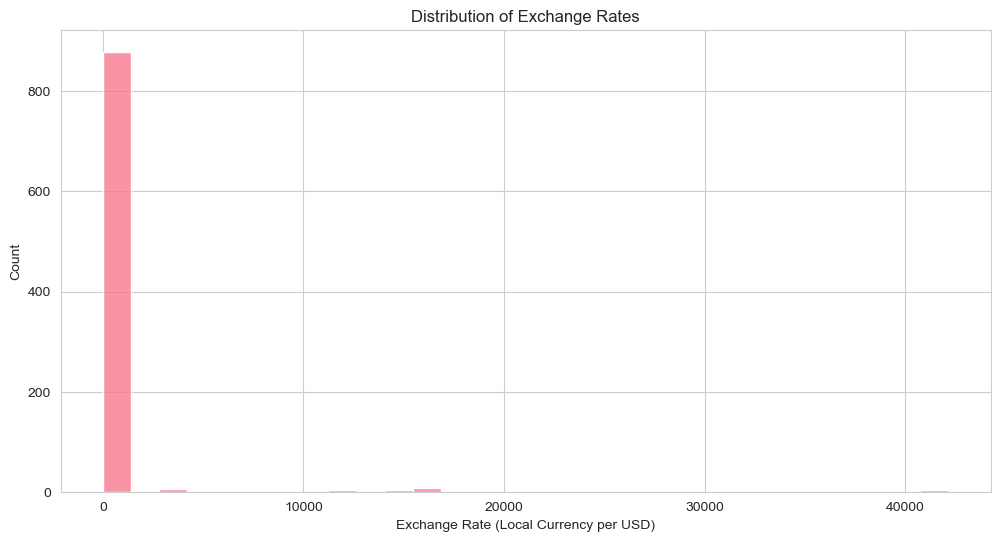

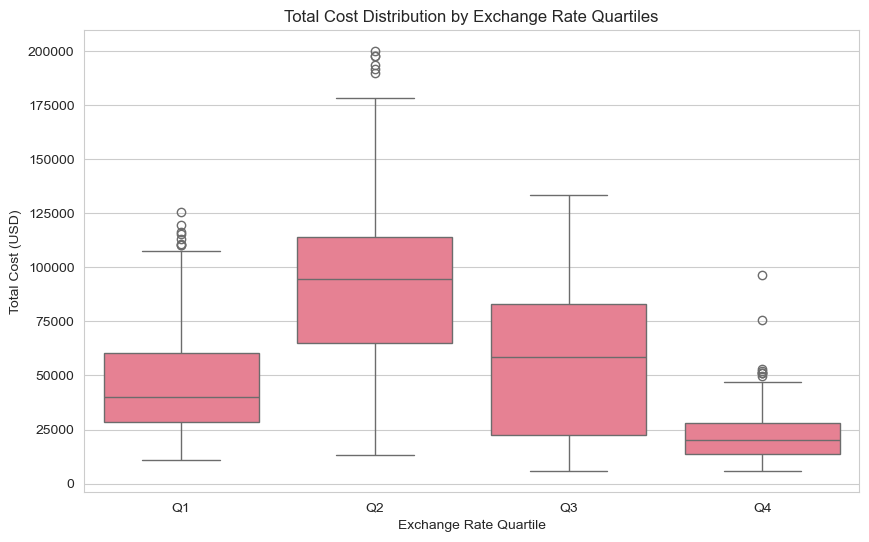

In [9]:
# 4. Outlier Detection and Currency Conversion Stability Analysis

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in key cost variables
cost_variables = ['Tuition_USD', 'Rent_USD', 'Total_Cost_USD']

print("Outlier Analysis:")
for var in cost_variables:
    outliers = detect_outliers(df, var)
    print(f"\nOutliers in {var}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df)*100):.2f}%")
    print("\nTop 5 highest outliers:")
    print(outliers.nlargest(5, var)[['Country', 'University', 'Program', var]])

# Currency conversion stability analysis
print("\nCurrency Conversion Stability Analysis:")

# Calculate coefficient of variation for exchange rates by country
exchange_rate_stability = df.groupby('Country')['Exchange_Rate'].agg(['mean', 'std', 'count'])
exchange_rate_stability['cv'] = exchange_rate_stability['std'] / exchange_rate_stability['mean']
exchange_rate_stability = exchange_rate_stability.sort_values('cv', ascending=False)

print("\nExchange Rate Variation by Country:")
print(exchange_rate_stability.head(10))

# Visualize exchange rate distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Exchange_Rate', bins=30)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Exchange Rate (Local Currency per USD)')
plt.ylabel('Count')
plt.show()

# Create box plot of Total Costs by Exchange Rate quartiles
df['Exchange_Rate_Quartile'] = pd.qcut(df['Exchange_Rate'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exchange_Rate_Quartile', y='Total_Cost_USD')
plt.title('Total Cost Distribution by Exchange Rate Quartiles')
plt.xlabel('Exchange Rate Quartile')
plt.ylabel('Total Cost (USD)')
plt.show()


Displaying analysis for all countries:


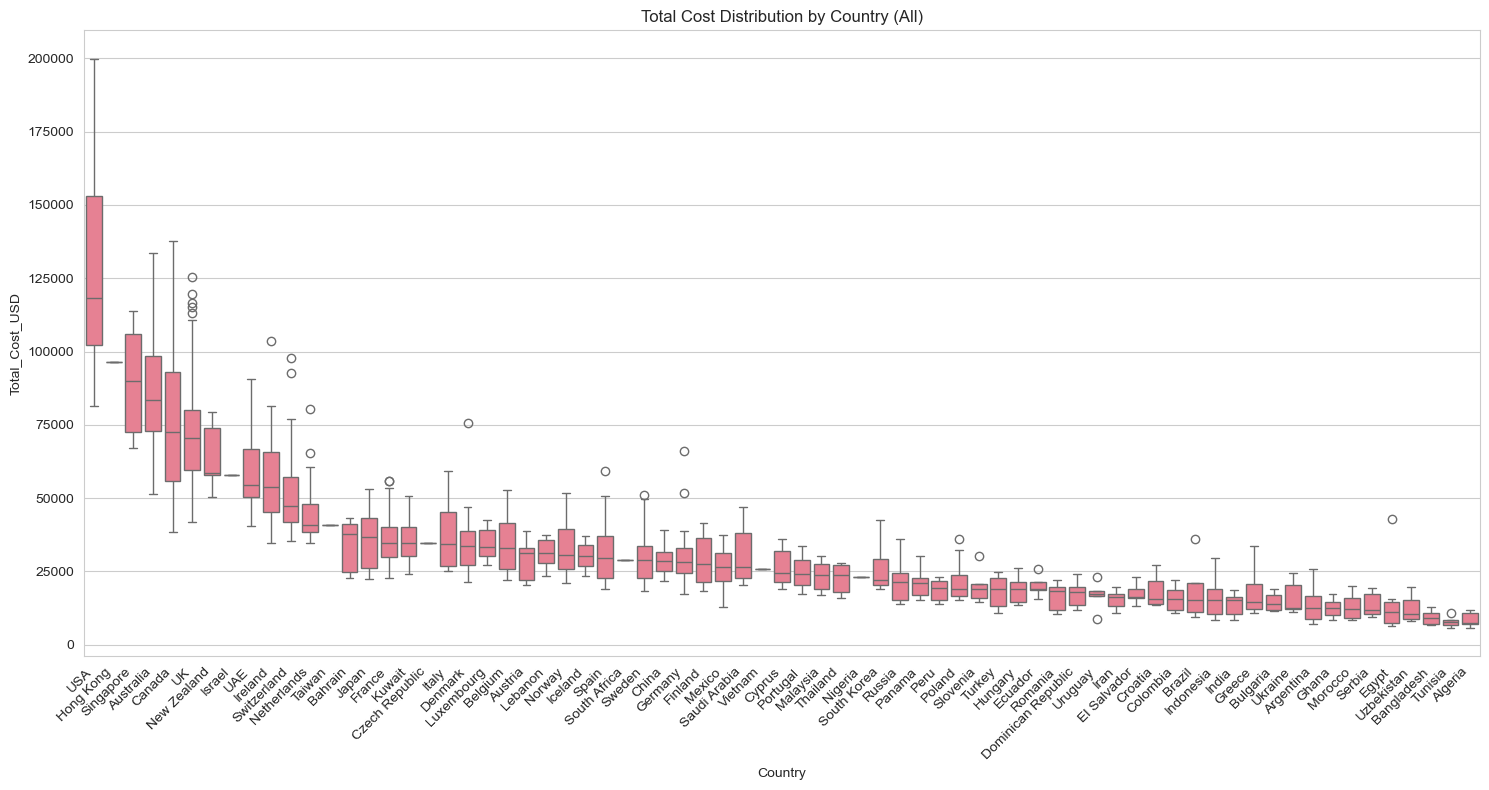


Summary Statistics for Country:
                mean    median      std  count
Country                                       
USA        127748.46 118210.00 32533.80     78
Hong Kong   96520.00  96520.00      NaN      1
Singapore   89517.78  89840.00 16745.91     18
Australia   85741.28  83500.00 18834.84     86
Canada      73643.55  72385.00 23510.96     76
...              ...       ...      ...    ...
Egypt       14844.29  11060.00 12878.74      7
Uzbekistan  12496.00  10460.00  4903.56      5
Bangladesh   9216.00   9000.00  2606.43      5
Tunisia      7773.33   7610.00  1696.14      6
Algeria      8532.00   7340.00  2633.58      5

[71 rows x 4 columns]

Displaying analysis for top 10 countries by median cost:


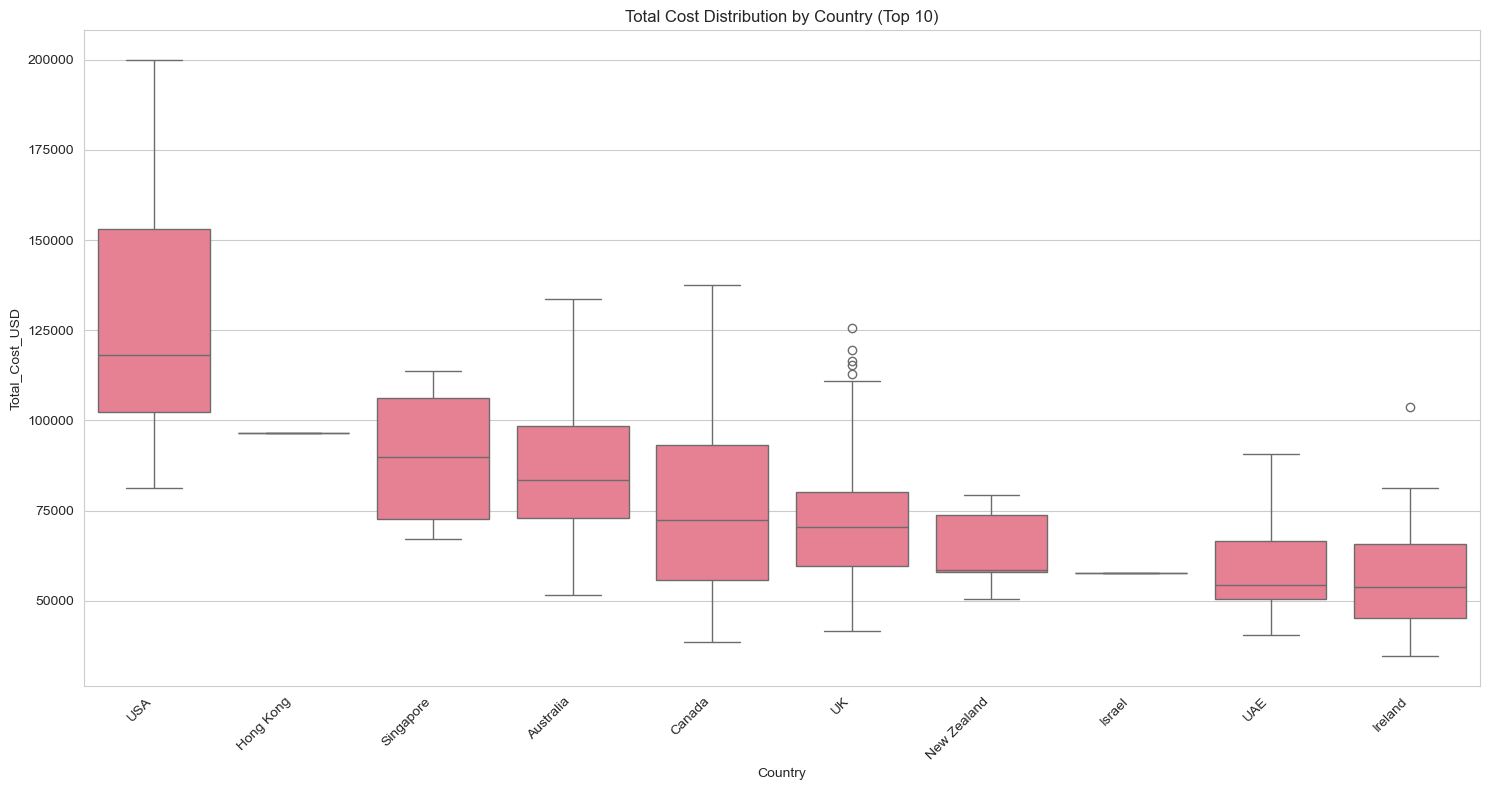


Summary Statistics for Country:
                 mean    median      std  count
Country                                        
USA         127748.46 118210.00 32533.80     78
Hong Kong    96520.00  96520.00      NaN      1
Singapore    89517.78  89840.00 16745.91     18
Australia    85741.28  83500.00 18834.84     86
Canada       73643.55  72385.00 23510.96     76
UK           73048.98  70490.00 18716.88     93
New Zealand  62987.22  58630.00 10270.62      9
Israel       57750.00  57750.00      NaN      1
UAE          59182.50  54320.00 16330.82      8
Ireland      58805.00  53800.00 21168.40     10


In [10]:
# Enhanced Cost Distribution Analysis

def create_boxplot_with_options(data, x_col, y_col, title, figsize=(15, 8), rotation=45):
    plt.figure(figsize=figsize)
    # Sort countries by median cost for better visualization
    median_values = data.groupby(x_col)[y_col].median().sort_values(ascending=False)
    data_sorted = data.copy()
    data_sorted[x_col] = pd.Categorical(data_sorted[x_col], categories=median_values.index, ordered=True)
    
    # Create the boxplot
    sns.boxplot(data=data_sorted, x=x_col, y=y_col)
    plt.xticks(rotation=rotation, ha='right')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    summary_stats = data.groupby(x_col)[y_col].agg(['mean', 'median', 'std', 'count']).sort_values('median', ascending=False)
    print(f"\nSummary Statistics for {x_col}:")
    print(summary_stats)

# Show all countries
print("Displaying analysis for all countries:")
create_boxplot_with_options(df, 'Country', 'Total_Cost_USD', 'Total Cost Distribution by Country (All)')

# Show top 10 countries for comparison
print("\nDisplaying analysis for top 10 countries by median cost:")
top_10_countries = df.groupby('Country')['Total_Cost_USD'].median().nlargest(10).index
df_top_10 = df[df['Country'].isin(top_10_countries)]
create_boxplot_with_options(df_top_10, 'Country', 'Total_Cost_USD', 'Total Cost Distribution by Country (Top 10)')


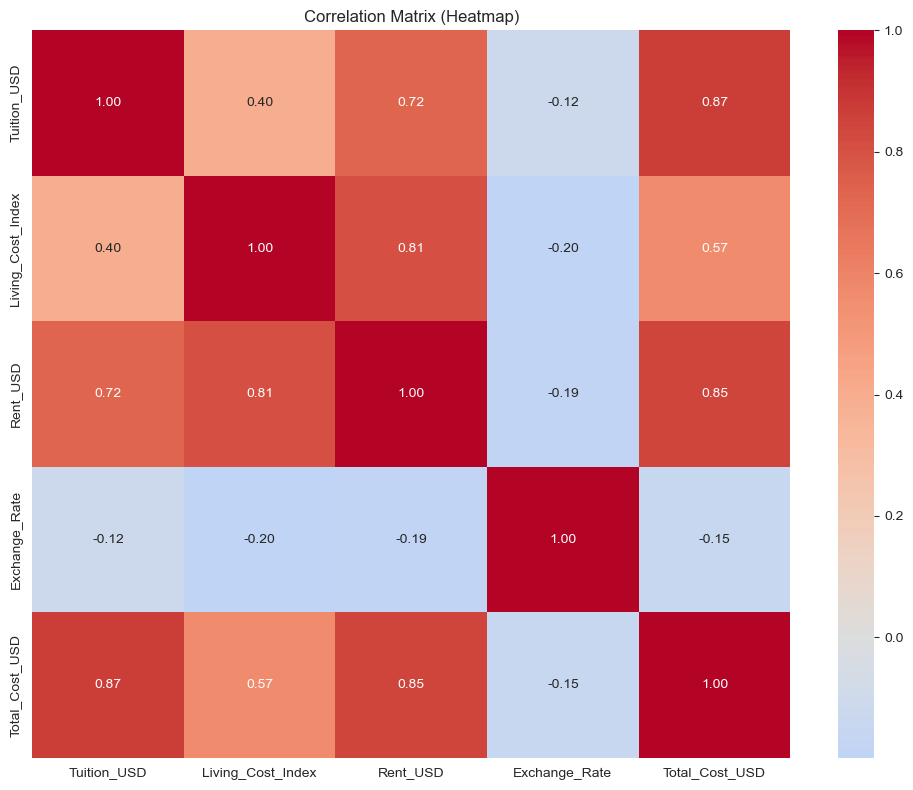


Generating pairplot (this shows the actual distribution of data points):


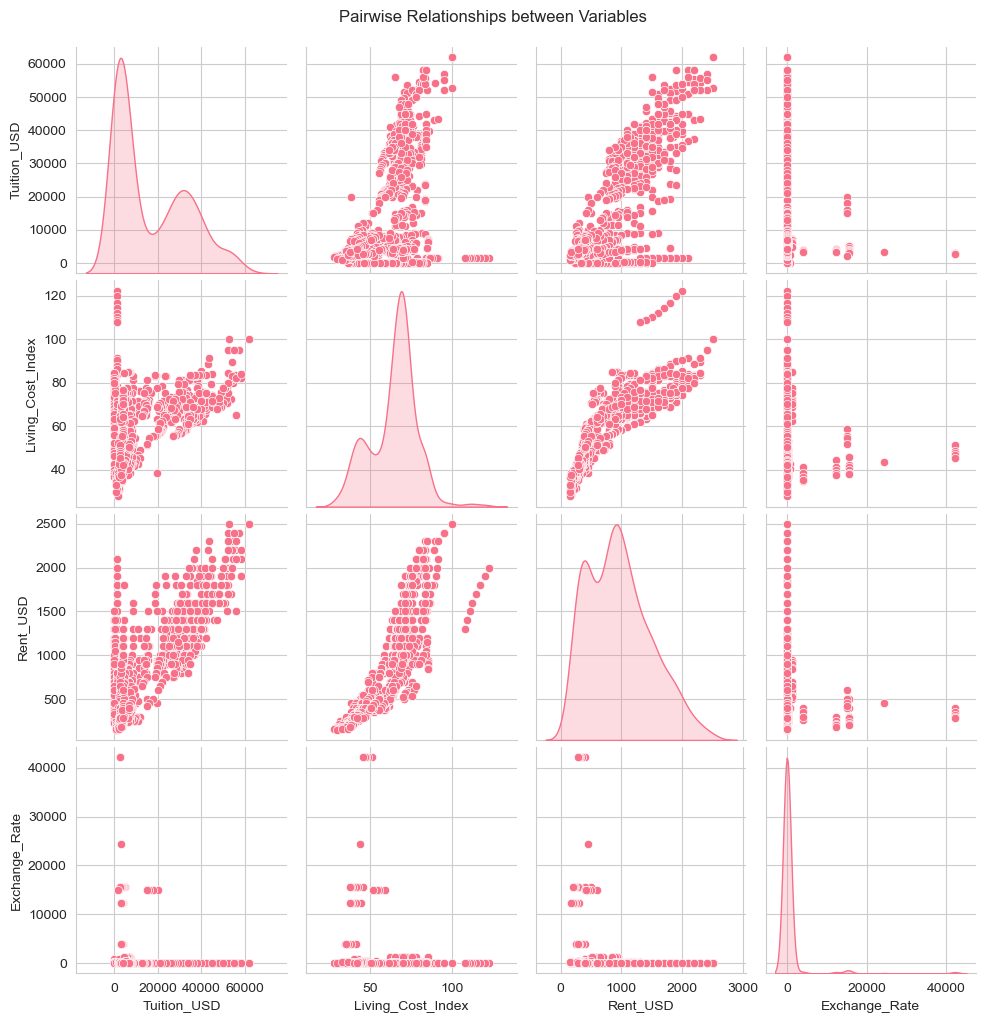


Detailed Correlation Analysis:
Living_Cost_Index vs Tuition_USD: 0.397

Living_Cost_Index vs Rent_USD: 0.811
   Strong correlation detected!

Living_Cost_Index vs Total_Cost_USD: 0.568
   Strong correlation detected!

Rent_USD vs Tuition_USD: 0.724
   Strong correlation detected!

Rent_USD vs Total_Cost_USD: 0.850
   Strong correlation detected!

Exchange_Rate vs Tuition_USD: -0.117

Exchange_Rate vs Living_Cost_Index: -0.199

Exchange_Rate vs Rent_USD: -0.194

Exchange_Rate vs Total_Cost_USD: -0.148

Total_Cost_USD vs Tuition_USD: 0.870
   Strong correlation detected!



In [11]:
# Enhanced Correlation Analysis

# 1. Heatmap with annotations
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Exchange_Rate', 'Total_Cost_USD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Heatmap)')
plt.tight_layout()
plt.show()

# 2. Pairplot for direct visualization of relationships
print("\nGenerating pairplot (this shows the actual distribution of data points):")
sns.pairplot(df[['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Exchange_Rate']], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Variables', y=1.02)
plt.show()

# 3. Print detailed correlation analysis
print("\nDetailed Correlation Analysis:")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 < col2:  # Avoid printing duplicate correlations
            corr = correlation_matrix.loc[col1, col2]
            print(f"{col1} vs {col2}: {corr:.3f}")
            if abs(corr) > 0.5:
                print("   Strong correlation detected!")
            print()



Outlier Analysis for Tuition_USD:
Summary Statistics:
Mean: 16705.02
Standard Deviation: 16582.39
Q1: 2850.00
Q3: 31100.00
IQR: 28250.00

IQR Method Outliers:
Lower bound: -39525.00
Upper bound: 73475.00
Number of outliers: 0

Z-score Method Outliers:
Number of outliers: 0


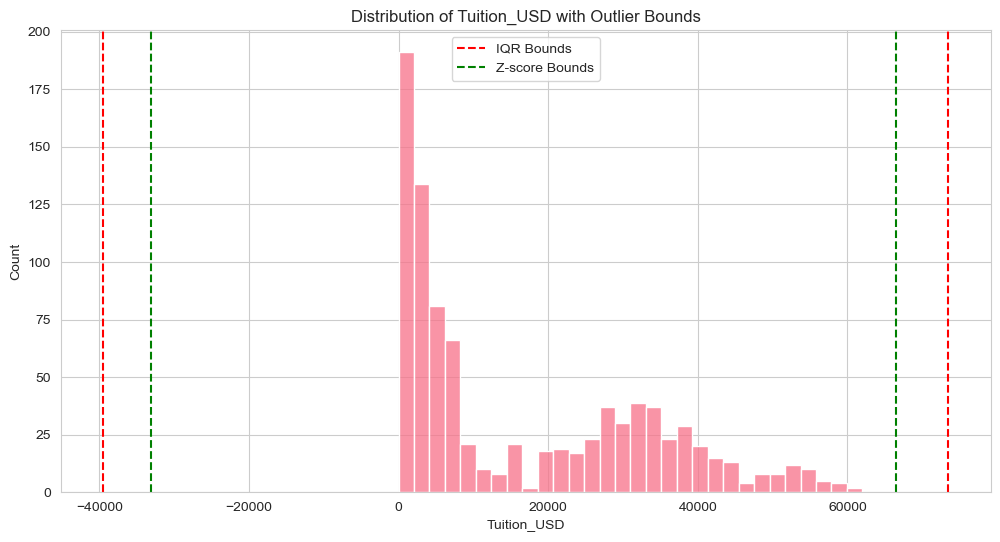


Outlier Analysis for Rent_USD:
Summary Statistics:
Mean: 969.21
Standard Deviation: 517.15
Q1: 545.00
Q3: 1300.00
IQR: 755.00

IQR Method Outliers:
Lower bound: -587.50
Upper bound: 2432.50
Number of outliers: 3

Z-score Method Outliers:
Number of outliers: 0


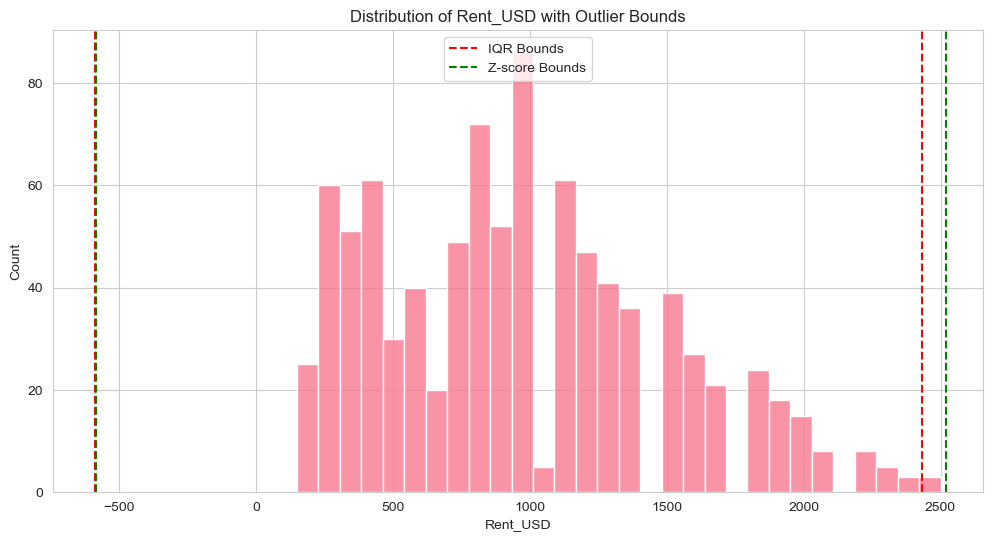


Top 5 highest outliers for Rent_USD:
    Country           University       Program  Rent_USD
131     USA  Columbia University  Data Science      2500
412     USA  Columbia University     Economics      2500
877     USA  Columbia University  Data Science      2500

Outlier Analysis for Total_Cost_USD:
Summary Statistics:
Mean: 52218.11
Standard Deviation: 37459.16
Q1: 22644.50
Q3: 75600.00
IQR: 52955.50

IQR Method Outliers:
Lower bound: -56788.75
Upper bound: 155033.25
Number of outliers: 18

Z-score Method Outliers:
Number of outliers: 11


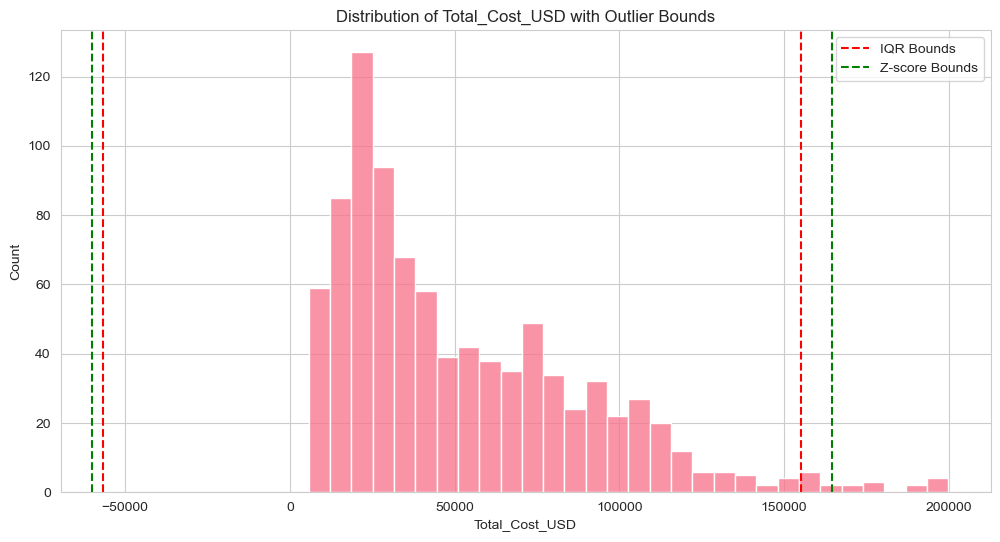


Top 5 highest outliers for Total_Cost_USD:
    Country           University                 Program  Total_Cost_USD
29      USA  Stanford University        Computer Science       199860.00
402     USA  Stanford University                 Physics       197660.00
856     USA  Stanford University        Computer Science       197660.00
30      USA                  MIT  Electrical Engineering       193460.00
884     USA                 UCLA    Computer Engineering       191660.00

Currency Stability Analysis:

Exchange Rate Variation by Country:
             Exchange_Rate                                    
                      mean    std      min      max count   cv
Country                                                       
Argentina           366.08 223.11   275.00   821.50     6 0.61
Denmark               5.92   2.99     0.15     7.45    15 0.51
Turkey               28.72   0.67    28.50    30.50     9 0.02
Russia               95.20   0.90    92.80    95.50     9 0.01
Poland    

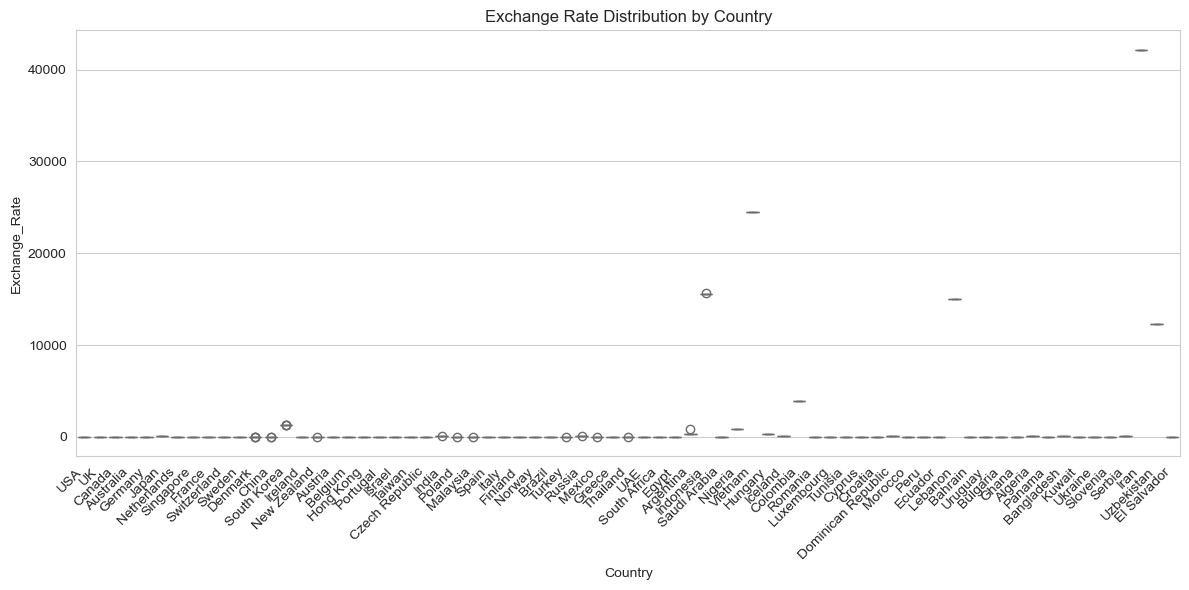

In [12]:
# Detailed Outlier Detection and Currency Stability Analysis

# 1. Outlier Detection using Multiple Methods
def analyze_outliers(df, column):
    # Method 1: IQR Method (detects values beyond 1.5 * IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Method 2: Z-score Method (detects values beyond 3 standard deviations)
    mean = df[column].mean()
    std = df[column].std()
    z_score_outliers = df[abs(df[column] - mean) > 3*std]
    
    print(f"\nOutlier Analysis for {column}:")
    print(f"Summary Statistics:")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    
    print(f"\nIQR Method Outliers:")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    iqr_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers: {len(iqr_outliers)}")
    
    print(f"\nZ-score Method Outliers:")
    print(f"Number of outliers: {len(z_score_outliers)}")
    
    # Visualize distribution with outliers
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column, bins=30)
    plt.axvline(lower_bound, color='r', linestyle='--', label='IQR Bounds')
    plt.axvline(upper_bound, color='r', linestyle='--')
    plt.axvline(mean - 3*std, color='g', linestyle='--', label='Z-score Bounds')
    plt.axvline(mean + 3*std, color='g', linestyle='--')
    plt.title(f'Distribution of {column} with Outlier Bounds')
    plt.legend()
    plt.show()
    
    return iqr_outliers

# Analyze outliers for key cost variables
for column in ['Tuition_USD', 'Rent_USD', 'Total_Cost_USD']:
    outliers = analyze_outliers(df, column)
    if len(outliers) > 0:
        print(f"\nTop 5 highest outliers for {column}:")
        print(outliers.nlargest(5, column)[['Country', 'University', 'Program', column]])

# 2. Currency Stability Analysis
print("\nCurrency Stability Analysis:")

# Calculate statistics for exchange rates
exchange_analysis = df.groupby('Country').agg({
    'Exchange_Rate': ['mean', 'std', 'min', 'max', 'count']
}).round(3)

# Calculate coefficient of variation (CV) to measure relative variability
exchange_analysis['Exchange_Rate', 'cv'] = (
    exchange_analysis['Exchange_Rate', 'std'] / 
    exchange_analysis['Exchange_Rate', 'mean']
).round(3)

# Sort by CV to identify countries with most variable exchange rates
exchange_analysis = exchange_analysis.sort_values(('Exchange_Rate', 'cv'), ascending=False)

print("\nExchange Rate Variation by Country:")
print(exchange_analysis)

# Visualize exchange rate distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Exchange_Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Exchange Rate Distribution by Country')
plt.tight_layout()
plt.show()
